In [16]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('default')
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn as sns

churn_data = pd.read_csv('C:\SkillBox\IDE\PY_13\churn.csv', sep=',')
churn_data = churn_data.drop('RowNumber', axis=1)
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Разработка кампании лояльности по удержанию клиентов банка

## Задание 9.1
Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

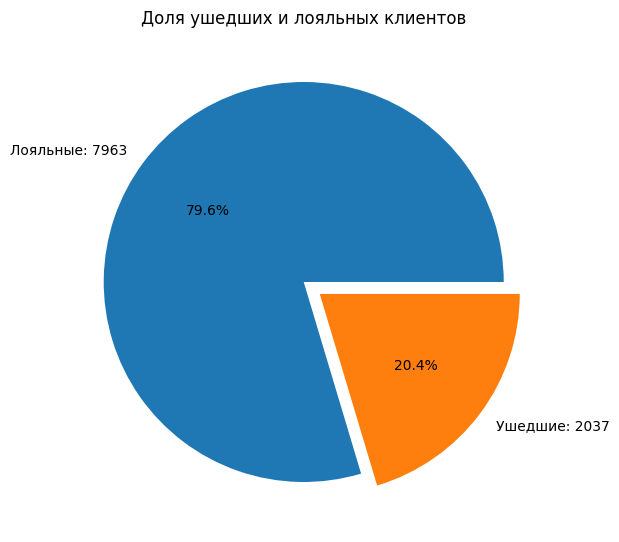

In [17]:
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    churn_data['Exited'].value_counts(),
    labels=[f"Лояльные: {churn_data['Exited'].value_counts()[0]}", f"Ушедшие: {churn_data['Exited'].value_counts()[1]}"],
    autopct='%.1f%%',
    explode=[0, 0.1]
)
plt.title('Доля ушедших и лояльных клиентов')
plt.show()

### Вывод
Доля лояльных банку клиентов почти 80%, тогда как ушедшие клиенты составляют чуть более 20%.

## Задание 9.2
Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

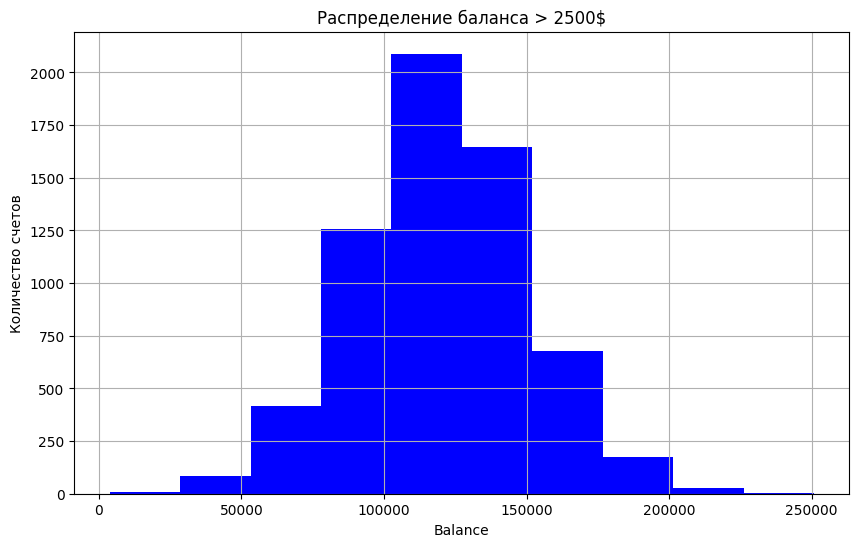

In [18]:
mask1 = churn_data['Balance']>2500 # Выбираем только тех клиентов, у кого баланс больше 2500$
churn_data[mask1]['Balance'].plot(
    kind='hist',
    figsize=(10, 6),
    title='Распределение баланса > 2500$',
    grid = True,
    color = 'blue',
    bins=10,     
)
plt.ylabel('Количество счетов')
plt.xlabel('Balance')
plt.show()

### Вывод
График, учитывающий клиентов с балансом более 2500$, показывает, что наиболее часто встречающееся значение суммы баланса находится в диапазоне от 100к до 150к$

## Задание 9.3
Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

In [19]:
exited_0 = churn_data['Balance'][churn_data['Exited'] == 0] # баланс только лояльных клиентов
exited_1 = churn_data['Balance'][churn_data['Exited'] == 1] # баланс только ушедших
amount1 = churn_data.groupby('Exited')['Balance'].sum() # сумма балансов лояльных и ушедших клиентов
nozero_balance = churn_data[churn_data['Balance']>0] # балансы больше нуля

fig = make_subplots(rows=1, cols=3, subplot_titles=("Распределение балансов", "Распределение среди ненулевых счетов", "Сумма балансов"))

fig.add_trace(go.Box(x=exited_1, name='Ушедшие'), row=1, col=1)
fig.add_trace(go.Box(x=exited_0, name='Лояльные'), row=1, col=1)
fig.add_trace(go.Histogram(x=nozero_balance['Balance'][nozero_balance['Exited'] == 0], name='Лояльные'), row=1, col=2)
fig.add_trace(go.Histogram(x=nozero_balance['Balance'][nozero_balance['Exited'] == 1], name='Ушедшие'), row=1, col=2)
fig.add_trace(go.Bar(y=amount1.values, x=amount1.index, name='Сумма баланса', text=amount1.values), row=1, col=3)

# Update xaxis properties
fig.update_xaxes(title_text="сумма баланса", row=1, col=1)
fig.update_xaxes(title_text="сумма баланса", row=1, col=2)
fig.update_xaxes(title_text="0 - лояльные; 1 - ушедшие", row=1, col=3, dtick=1)

# Update yaxis properties
fig.update_yaxes(title_text="статус 'Exited'", row=1, col=1)
fig.update_yaxes(title_text="количество клиентов", row=1, col=2)
fig.update_yaxes(title_text="общая сумма балансов", row=1, col=3)

# Update title, height and width
fig.update_layout(title_text="Данные по балансам ушедших и лояльных клиентов", height=600, width=1500)

fig.show()




### Вывод
Медианное значение ушедших клиентов превышает медианное значение лояльных и превышает 100к$ (график 1). Можно сказать, что уход каснулся наиболее массового сегмента клиентов банка. Кроме того, нижняя граница "тела ящика"(1-й квартиль) "Лояльных" клиентов смещена в сторону нулевых балансов, что говорит о том, что среди них много тех, кто не держит денег на балансе, а значит не сильно волнуется о каких-то изменениях в банке, которые могли подтолкнуть к уходу клиентов из группы "Ушедшие". Поэтому для наглядности лучше отбросить нулевые счета и посмотреть на рапределение балансов среди ненулевых счетов (график 2). Мы также видим, что ушедшие распределены равномерно. Также было бы полезно знать какую общую сумму потерял банк вместе с ушедшими клиентами (график 3). Скорей всего, в банке произошли какие-то ухудшения условий обслуживания, либо появились конкуренты с более выгодными условиями, но по этим данным пока нельзя сделать окончательные выводы.

# Задание 9.4
Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

In [20]:
exited_0_age = churn_data['Age'][churn_data['Exited'] == 0] # возраст лояльных клиентов
exited_1_age = churn_data['Age'][churn_data['Exited'] == 1] # возраст ушедших клиентов

fig = go.Figure()
fig.add_trace(go.Box(x=exited_1_age, name='Ушедшие'))
fig.add_trace(go.Box(x=exited_0_age, name='Лояльные'))
fig.update_layout(title="Распределение возраста среди ушедших и лояльных клиентов",
                xaxis_title="Возраст", height=600, width=1500)

fig.show()

### Вывод
Возраст большей части ушедших клиентов от 40 до 50 лет, тогда как лояльных от 32 до 42. Возможно, уход был связан с тем, что условия на какие-то виды услуг банка, например, на кредиты, отличались для группы более возрастных клиентов в худшую сторону по сравнению с более молодыми клиентами. Скорей всего, это связано с уровнем дохода. Могу предположить, что доходы более молодых клиентов выше, и банк видит именно в них перспективных потребителей своих услуг. Возможно, банку стоит обратить внимание, на то, что более возрастные клиенты являются более консервативными по отношению к рискам и не склонны к большим тратам (в том числе с помощьюю кредита), так как примерно к 50 годам успевают достигнуть своих материальных целей. Таким клиентам нужно предлагать другие продукты, искать особый подход, чтобы сохранить их средства, как стабильный источник пассивов. 
Выбросов больше в группе лояльных клиентов. Среди них есть клиенты значительно старше пенсионного возраста. 

# Задание 9.5
Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

In [21]:
salary_CS = churn_data.groupby('CustomerId')[['EstimatedSalary', 'CreditScore', 'Exited']].last() # группируем по CustomId, чтобы получить таблицу, где по каждому клиенту видно какая у него ожидаемая зарплата и кредитный рейтинг
salary_CS = salary_CS.sort_values(by=['EstimatedSalary'], ascending=True) # сортируем по возрастанию
display(salary_CS)

,EstimatedSalary,CreditScore,Exited
CustomerId,,,
15791053,11.58,709,1
15679693,90.07,625,0
15786463,91.75,645,1
15639662,96.27,710,0
15602851,106.67,629,0
...,...,...,...
15709136,199909.32,620,0
15762331,199929.17,569,0
15697270,199953.33,608,0


C:\Users\Dmitriy\AppData\Local\Temp\ipykernel_15200\2622796971.py:4: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



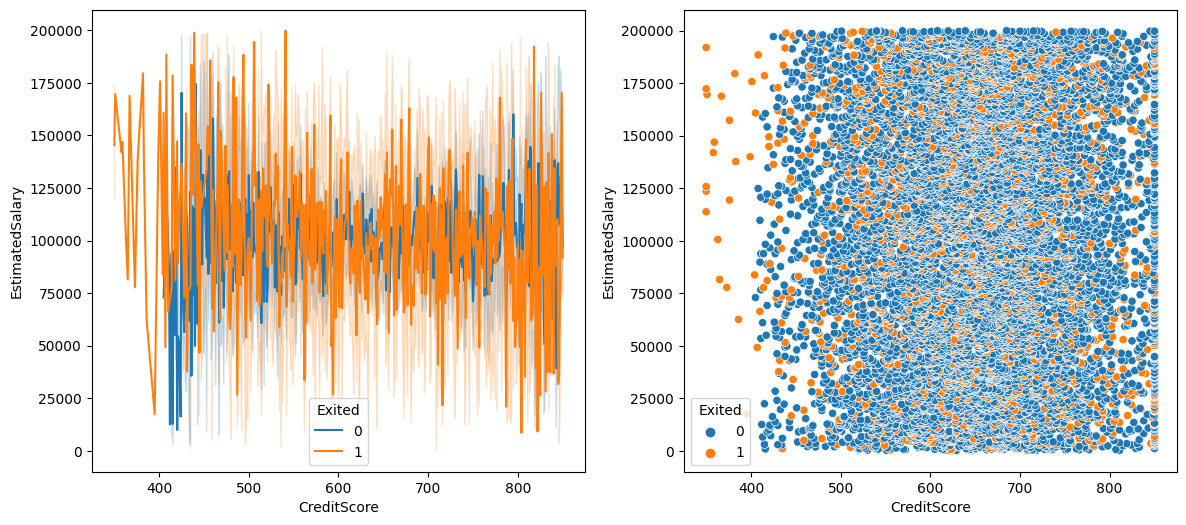

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6)) # для наглядности сделаем два графика: линейный и точечный 
sns.lineplot(x="CreditScore", y='EstimatedSalary', hue='Exited', data=salary_CS, ax=axes[0])
sns.scatterplot(x="CreditScore", y='EstimatedSalary', hue='Exited', data=salary_CS, ax=axes[1])
fig.show()

### Вывод
Основной вопрос этого задания: есть ли взимосвязь между кредитным рейтингом клиента и его ожидаемой зарплаты. Даже глядя на таблицу, без всякого графика видно, что связи нет, так как рейтинг нескольких клиентов с минимальной зарплатой оказался выше, чем рейтинг клиентов с зарплатой максимальной. Убедимся в этом, посмотрев на графики - действительно визуально сложно выявить каку-то взаимосвязь. Кроме того, графики перегружены данными и следовало бы разбить клиентов на категории и искать связь между ними, но в рамках этого задания такой задачи не стоит. Очевидно одно, что у банка кредитный рейтинг определяется не по критерию ожидаемой зарплаты. 

# Задание 9.6
Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

In [23]:
exited_clients = churn_data[churn_data['Exited']==1] # отфильтруем таблицу по ушедшим клиентам
fig = px.pie(exited_clients, values=exited_clients['Gender'].value_counts().values, names=exited_clients['Gender'].value_counts().index, width=700, height=500)
fig.update_layout(title="Распределение по полу среди ушедших клиентов")

fig.show() 

### Вывод
На графике видно, что среди ушедших клиентов женщин больше, но не критично. В целом только по этому показателю сложно делать какие-то обоснованные выводы, так как, возможно, что многие клиенты связаны семейными или дружественными отношениями, а, как правило, финансовыми вопросами занимаются именно мужчины. 

# Задание 9.7
Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

In [24]:
fig = go.Figure()
fig.add_trace(go.Bar(x = churn_data[churn_data['Exited']==0]['NumOfProducts'].value_counts().index, y = churn_data[churn_data['Exited']==0]['NumOfProducts'].value_counts().values, name='Лояльные', text=churn_data[churn_data['Exited']==0]['NumOfProducts'].value_counts().values))
fig.add_trace(go.Bar(x = churn_data[churn_data['Exited']==1]['NumOfProducts'].value_counts().index, y = churn_data[churn_data['Exited']==1]['NumOfProducts'].value_counts().values, name='Ушедшие', text=churn_data[churn_data['Exited']==1]['NumOfProducts'].value_counts().values))
fig.update_layout(barmode='stack', width=1000, height=500, title_text="Количество купленных услуг банка среди ушедших и лояльных клиентов")
fig.update_xaxes(title_text="NumOfProducts", dtick=1)
fig.update_yaxes(title_text="Количество клиентов")

fig.show() 

### Вывод
Среди клиентов пользовавшихся одной или двумя услугами отток небольшой. А вот среди тех, кто купил более, чем две услуги, практически все клиенты ушли, что говорит о негативном опыте пользования этими услугами. Таким образом, график демонстрирует прямую зависимость ухода клиентов от количества приобретенных услуг, если их более двух. Тут надо более детально изучать какие именно услуги влияют на желание клиентов уйти из банка. 

# Задание 9.8
Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

In [25]:
fig = go.Figure()
fig.add_trace(go.Bar(x = churn_data[churn_data['Exited']==0]['IsActiveMember'].value_counts().index, y = churn_data[churn_data['Exited']==0]['IsActiveMember'].value_counts().values, name='Лояльные', text=churn_data[churn_data['Exited']==0]['IsActiveMember'].value_counts().values))
fig.add_trace(go.Bar(x = churn_data[churn_data['Exited']==1]['IsActiveMember'].value_counts().index, y = churn_data[churn_data['Exited']==1]['IsActiveMember'].value_counts().values, name='Ушедшие', text=churn_data[churn_data['Exited']==1]['IsActiveMember'].value_counts().values))
fig.update_layout(barmode='stack', width=1000, height=500, title_text="Статус 'IsActiveMember' в разрезе оттока")
fig.update_xaxes(title_text="Статус 'IsActiveMember'", dtick=1)
fig.update_yaxes(title_text="Количество клиентов")

fig.show() 

### Вывод
В целом статус активного клиента не влияет на желание уйти из банка. К примеру, среди неактивных клиентов отток составил 26,9%, тогда как среди активных 14,3%. В банке явно наметился тренд на вывод средств. За указанный период из банка вывели порядка 24% от суммы всех балансов и ушли около 20% от всех клиентов. Это очень много. Хотя мы не имеем данных по привлеченным клиентам, такой массовый исход клиентов говорит, что либо банк ухудшает условия по своим продуктам, либо конкуренты активно переманивают клиентов, предлагая более интересные условия. В рамках этого задания нужно предложить варианты для удержания неактивных клиентов. Во-первых, нужно срочно реагировать на уход клиентов и провести опрос на тему "что устраивает, что не устраивает и чего бы хотелось". Во-вторых, для неактивных клиентов попробовать предложить продукт с планированием будущих доходов. Возможно, неактивность клиентов связана с низким уровнем финансовой грамотности, когда человек боится сложных финансовых решений поэтому опасается, например, кредита или не идет в инвестиции, пользуясь вкладами. В-третьих, провести исследование среди всех банковских продуктов на рынке и оценить свое положение относительно конкурентов. В-четвертых, попробовать объединить счета по признаку семьи и предложить семейные продукты. В этом случае клиентам легче будет принимать сложные решения совместно, а банк сможет снизить риски, к примеру, когда речь идет о кредите, так как можно оценить общий семейный доход.

# Задание 9.9
В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [26]:
exited_by_country = churn_data.groupby('Geography')['Exited'].mean() # группируем по признаку страны и выведем среднее значение по столбцу 'Exited'
fig = px.choropleth(
    data_frame=exited_by_country, #DataFrame
    locations=exited_by_country.index, #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой Plotly
    color="Exited", #от чего зависит цвет
    range_color=[0, 1], #диапазон цвета
    title='Доля ушедших клиентов по странам', #заголовок
    width=800, #ширина
    height=500, #высота
)

fig.show()

### Вывод 
Чем ближе к желтому цвету, тем больше доля ушедших клиентов. В нашем случае это Германия. Возможно, именно в этой стране стоит искать активизировашихся конкурентов либо какие-то изменения во внешних условиях (политика, изменение процентных ставок или налогов) 

# Задание 9.10
Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.
Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

In [27]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat) # создаем новый столбец 'CreditScoreCat', применяя функцию get_credit_score_cat к столбцу 'CreditScore'

new_data = churn_data.copy() # создаем копию основной таблицы, чтобы не потерять начальные данные
pivot = new_data.pivot_table(
    values='Exited', # данные по условию задания
    index='CreditScoreCat', # строки новой таблицы
    columns='Tenure', # столбцы новой таблицы
    aggfunc='mean' # применяем среднее значение к values
).round(3)
display(pivot)

fig = px.imshow(pivot, text_auto=True, aspect="auto")
fig.update_layout(width=800, height=500)
fig.update_xaxes(side="top")
fig.show()

Tenure,0,1,2,3,4,5,6,7,8,9,10
CreditScoreCat,,,,,,,,,,,
Excellent,0.275,0.208,0.137,0.168,0.132,0.233,0.241,0.128,0.196,0.271,0.255
Fair,0.217,0.216,0.213,0.216,0.197,0.207,0.236,0.171,0.209,0.190,0.205
Good,0.204,0.204,0.187,0.206,0.195,0.214,0.183,0.192,0.152,0.195,0.198
Poor,0.226,0.259,0.212,0.212,0.233,0.199,0.180,0.151,0.215,0.251,0.169
Very_Poor,0.444,0.254,0.152,0.286,0.293,0.149,0.225,0.206,0.254,0.230,0.333


### Вывод
Чем ближе к желтому цвету, тем чаще уходят клиенты из данной категории. Как мы видим, наиболее часто уходят клиенты из категории 'Very_Poor', которые пользуются услугами банка не более года, что вполне ожидаемо, так как они не являются ценными клиентами, и банк не принимает никаких усилий их удержать. Но тот факт, что на втором месте оказались клиенты со сроком обслуживания 10 лет, хоть и из той же категории, вызывает удивление. Это сложно объяснить логически кроме предположения, что сам банк не ценит таких клиентов и не обладает комплексом услуг, адаптированных к самой бедной категории клиентов. Возможно в банке есть срок ожидания (10 лет), в течение которого он ждет, что клиенты разбогатеют, найдут высокоопачиваемую работу или выиграют в лоторею после чего просто перестает "работать" с такими клиентами.   